<a href="https://colab.research.google.com/github/musicjae/DeepLearning/blob/main/kmeans_tutorials_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[reference](https://www.kaggle.com/kushal1996/customer-segmentation-k-means-analysis/data?select=Mall_Customers.csv)

레이블된 데이터셋이 없는 경우에 어떻게 서로 다른 features 간의 상관 관계를 구한 뒤, 추천 시스템을 만들 것인가에 대해 고안

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Imports

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)
#print(os.listdir("../input"))  

In [4]:
df = pd.read_csv('/content/drive/My Drive/datasets/Mall_Customers/Mall_Customers.csv')

## Data Analyses


In [5]:
df.shape

(200, 5)

In [8]:
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [12]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

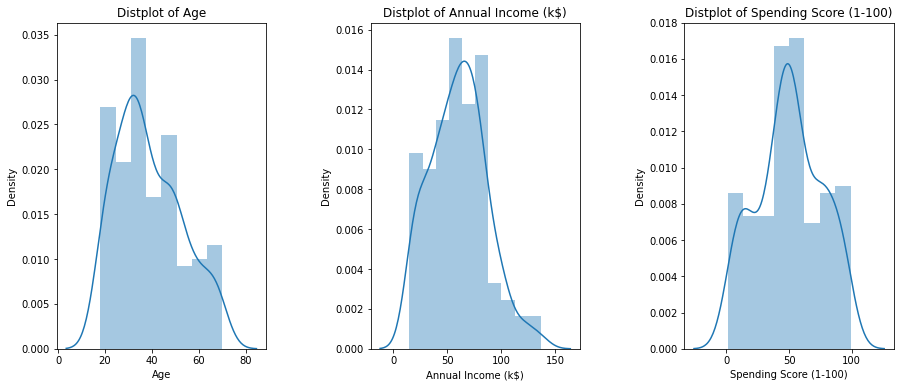

In [25]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.distplot(df[x]) # binsargument for matplotlib hist(), or None, optional, Specification of hist bins. If unspecified, as reference rule is used that tries to find a useful default.
    plt.title('Distplot of {}'.format(x))

plt.show()

- 나이__밀도: 40 대가 가장 많고, 20대가 그 다음  
- 연봉__ 밀도: 60000달러가 가장 많고, 100000 달러가 그 다음  
- 소비점수__밀도: 50 점 내외가 가장 많다  
 > Score assigned by the mall based on customer behavior and spending nature

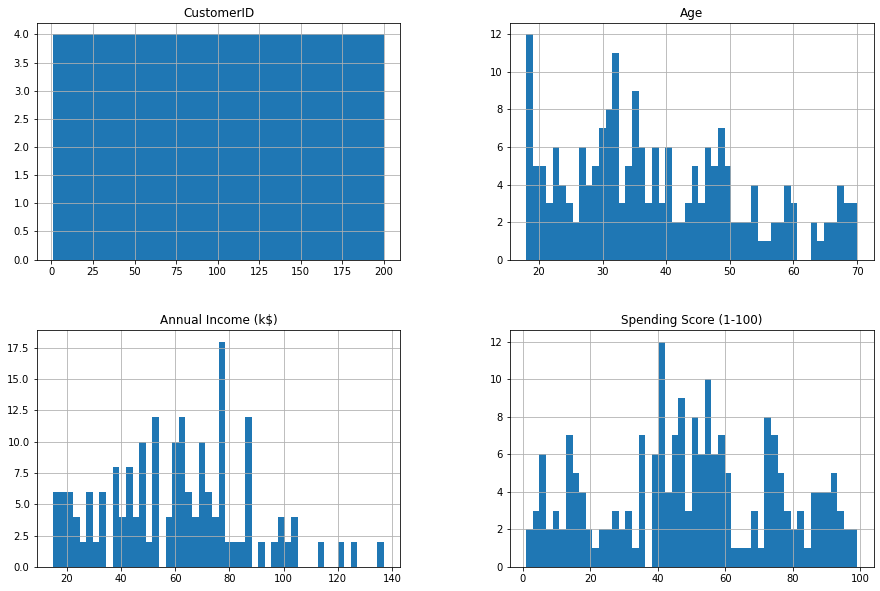

In [27]:
df.hist(bins=50, figsize=(15,10))
plt.show()

In [37]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

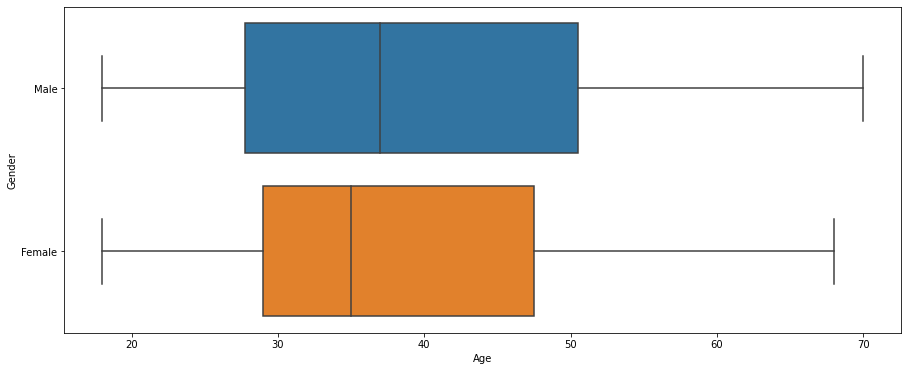

In [58]:
plt.figure(2 , figsize = (15 , 6))
sns.boxplot(x='Age',y='Gender',data=df)
plt.show()

## 남녀 별 나이에 따른 연봉 조사

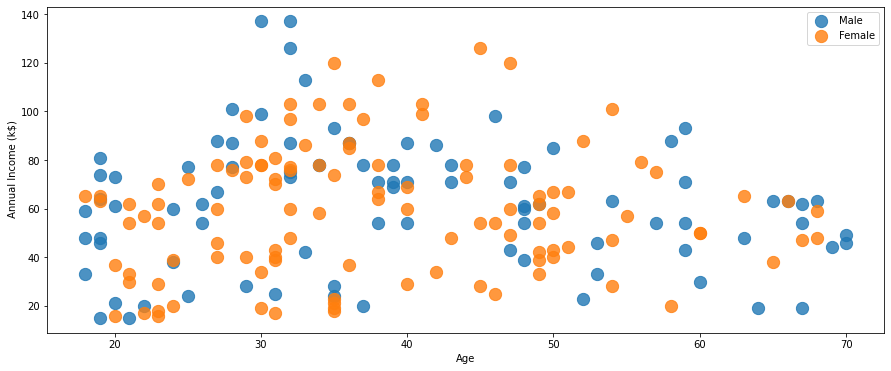

In [71]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x= 'Age', y= 'Annual Income (k$)', data=df[df['Gender']==gender], s=150, alpha=0.8, label=gender)

plt.xlabel('Age')
plt.ylabel(' Annual Income (k$)')

plt.legend()
plt.show()

In [73]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

## 남녀 별 연봉 크기에 따른 소비 점수 조사

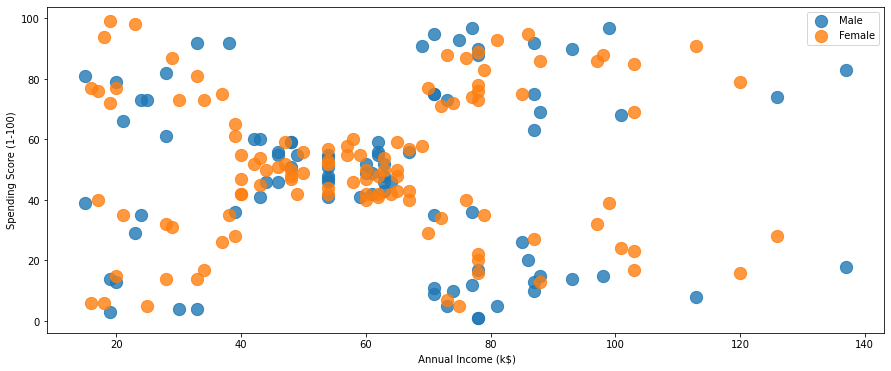

In [77]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(y= 'Spending Score (1-100)', x= 'Annual Income (k$)', data=df[df['Gender']==gender], s=150, alpha=0.8, label=gender)

plt.ylabel('Spending Score (1-100)')
plt.xlabel(' Annual Income (k$)')

plt.legend()
plt.show()

## K-means

[ref]('https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html')  
  
- algorithm: algorithm{“auto”, “full”, “elkan”}, default=”auto”
K-means algorithm to use. The classical EM-style algorithm is “full”. The “elkan” variation is more efficient on data with well-defined clusters, by using the triangle inequality. However it’s more memory intensive due to the allocation of an extra array of shape (n_samples, n_clusters).

For now “auto” (kept for backward compatibiliy) chooses “elkan” but it might change in the future for a better heuristic.

In [100]:
X2 = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values

kmeans = KMeans(n_clusters=6, algorithm='elkan')

kmeans.fit(X2)
labels2 = kmeans.labels_
centroids2 = kmeans.cluster_centers_

In [102]:
X2[:,0].shape

(200,)

In [106]:
h=0.02

xmin, xmax = X2[:,0].min()-1, X2[:,0].max()+1
ymin, ymax = X2[:,1].min()-1, X2[:,1].max()+1

xx, yy = np.meshgrid(np.arange(xmin, xmax, h), np.arange(ymin, ymax, h))
Z2 = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]) 


In [109]:
print(Z2.shape, xx.shape)

(31000000,) (5000, 6200)


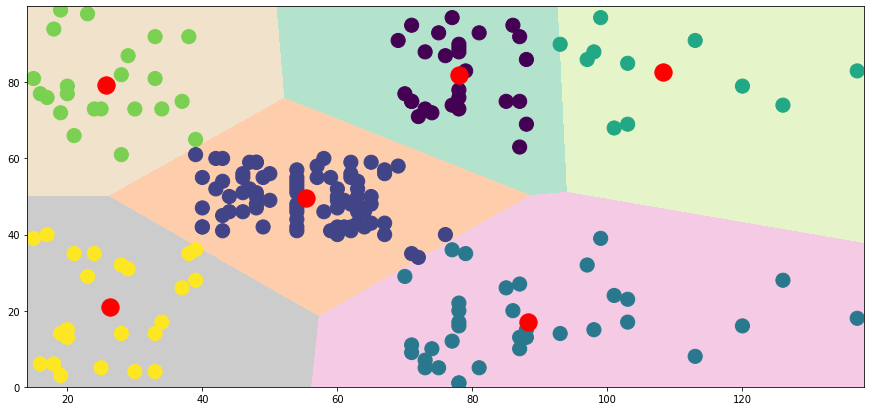

In [116]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = df , c = labels2 , 
            s = 200 )
plt.scatter(x=centroids2[:,0], y=centroids2[:,1], s=300, c='red')

## Silhouette Score to find the optimals

In [117]:
from sklearn import metrics
score = metrics.silhouette_score(X2, kmeans.labels_, metric='euclidean')
print(score)

0.5379675585622219
